In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('diabetes.csv')
print("First 5 Rows:")
print(df.head())

First 5 Rows:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [4]:
print("\nDataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nMissing values:\n", df.isnull().sum())


Dataset Shape: (768, 9)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Missing values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                        

In [5]:
from sklearn.model_selection import train_test_split

x = df.drop('Outcome', axis=1) 
y = df['Outcome']              

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(xtrain, ytrain)
predict_rf = model_rf.predict(xtest)

In [7]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(xtrain, ytrain)
predict_lr = model_lr.predict(xtest)

In [8]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [9]:
acc_rf = accuracy_score(ytest, predict_rf)
print("\nRandom Forest Accuracy:", acc_rf)
print("\nClassification Report - Random Forest:\n", classification_report(ytest, predict_rf))



Random Forest Accuracy: 0.7662337662337663

Classification Report - Random Forest:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82        99
           1       0.67      0.67      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



In [10]:
acc_lr = accuracy_score(ytest, predict_lr)
print("\nLogistic Regression Accuracy:", acc_lr)
print("\nClassification Report - Logistic Regression:\n", classification_report(ytest, predict_lr))


Logistic Regression Accuracy: 0.7467532467532467

Classification Report - Logistic Regression:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



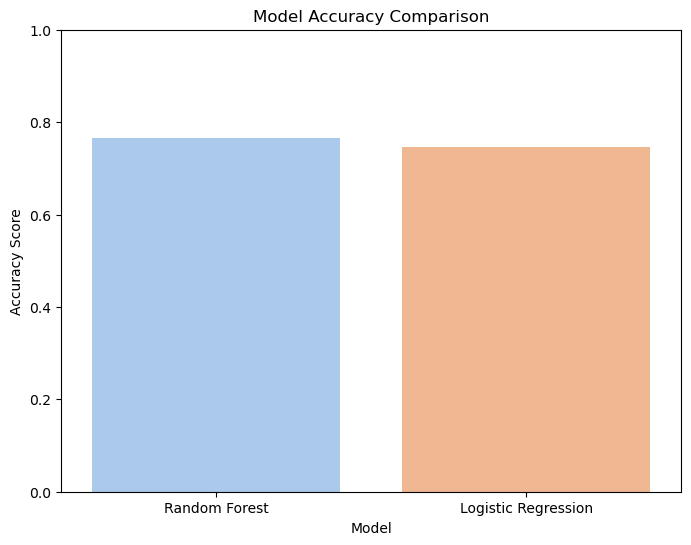

In [11]:
%matplotlib inline

models = ['Random Forest', 'Logistic Regression']
accuracies = [acc_rf, acc_lr]
plot_df = pd.DataFrame({'Model': models, 'Accuracy': accuracies})
plt.figure(figsize=(8, 6))
sns.barplot(data=plot_df, x='Model', y='Accuracy', hue='Model', palette='pastel', legend=False)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)
plt.show()

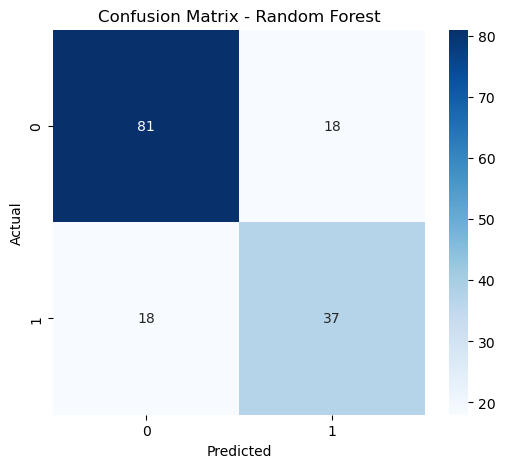

In [12]:
from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(ytest, predict_rf)

plt.figure(figsize=(6,5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


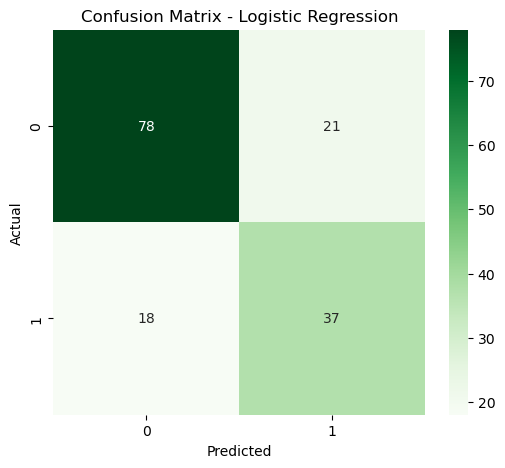

In [13]:
cm_lr = confusion_matrix(ytest, predict_lr)

plt.figure(figsize=(6,5))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()